<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:

movies.shape


(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:

movies.dtypes


star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:

# Using mean to find the average of the movie duration
movies.duration.mean()


120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:

# Duration for shortest movies
movies.sort_values('duration', ascending=True).head(1)


,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


In [7]:
# Duration for longest movies
movies.sort_values('duration', ascending=False).head(1)


,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

<AxesSubplot:ylabel='Frequency'>

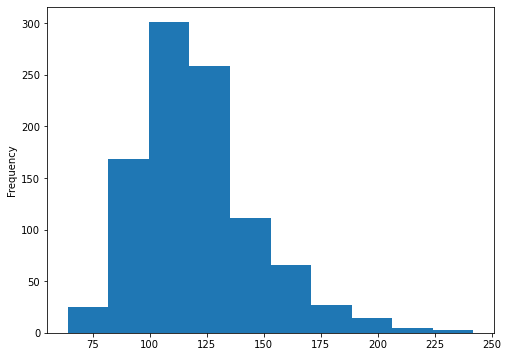

In [8]:
# Answer:

movies.duration.plot(kind='hist', bins=10, figsize=(8,6))


#### Use a box plot to display that same data.

<AxesSubplot:>

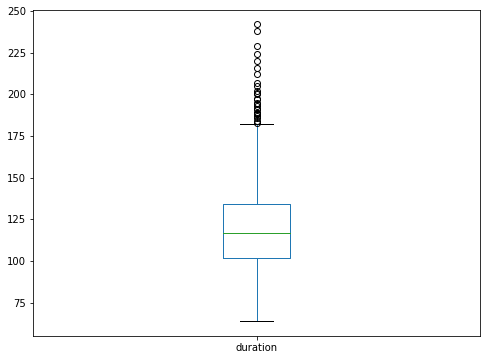

In [9]:
# Answer:

movies.duration.plot(kind='box', figsize=(8,6))


## Intermediate level

In [10]:
movies.head()


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Count how many movies have each of the content ratings.

In [11]:
# Answer:

movies.content_rating.value_counts()


R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

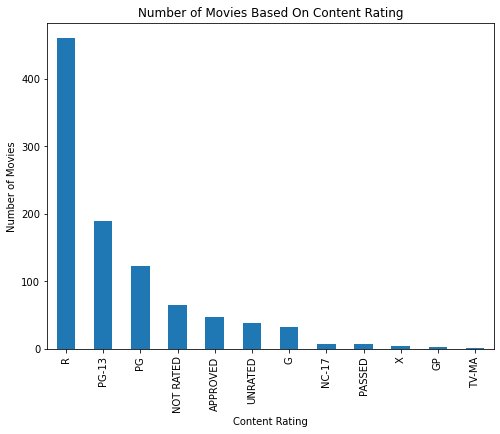

In [12]:
# Answer:

movies.content_rating.value_counts().plot(kind='bar', figsize=(8,6));
plt.xlabel('Content Rating');
plt.ylabel('Number of Movies');
plt.title('Number of Movies Based On Content Rating');


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [13]:
# Answer:

# Replace the content_rating
movies.content_rating.replace(('NOT RATED', 'APPROVED', 'PASSED', 'GP'), 'UNRATED', inplace=True)


In [14]:
# To check if the content_rating for 'NOT RATED', 'APPROVED', 'PASSED', 'GP' has been replace
# There are additional value count in content_rating 'UNRATED' means it has been replace 
movies.content_rating.value_counts()


R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [15]:
# Answer:

movies.content_rating.replace(('X', 'TV-MA'), 'NC-17', inplace=True)


In [16]:
# To check if the content_rating for 'X' and 'TV-MA' has been replace
# There are additional value count in content_rating 'NC-17' means it has been replace
movies.content_rating.value_counts()


R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [17]:
# Answer:

movies.isnull().sum()


star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [18]:
# Answer:

# Fill in 'UNRATED' as value for missing values in content_rating
movies.content_rating.fillna(value='UNRATED', inplace=True)


In [19]:
# To check if the missing values has been fill up or not
movies.isnull().sum()


star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [20]:
# Answer:

# Convert 2 hours into minutes because duration is store in minutes
# Average star_rating for movies duration 2 hours (120 minutes) or longer

movies[movies.duration >= 120].star_rating.mean()


7.948898678414082

In [21]:
# Average star_rating for movies duration shorter than 2 hours (120 minutes)

movies[movies.duration < 120].star_rating.mean()


7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

<AxesSubplot:xlabel='duration', ylabel='star_rating'>

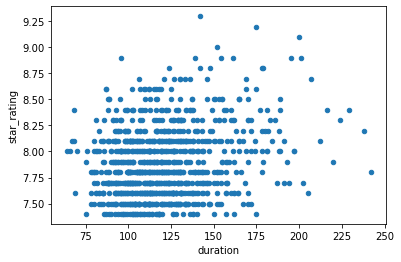

In [22]:
# Answer:

# Used scatter plot to check whether there is a relationship between duration and star_rating
movies.plot(kind='scatter', x='duration', y='star_rating')


#### Calculate the average duration for each genre.

In [23]:
# Answer:

# Used groupby for genre to find the average duration for each genre
movies.groupby('genre').duration.mean()


genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

array([[<AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'NC-17'}>],
       [<AxesSubplot:title={'center':'PG'}>,
        <AxesSubplot:title={'center':'PG-13'}>],
       [<AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'UNRATED'}>]], dtype=object)

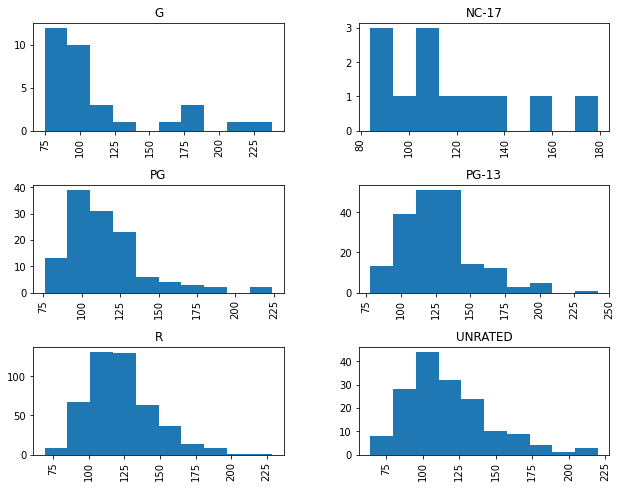

In [24]:
# Answer:

# Used histogram to visualize
movies.hist(column='duration', by='content_rating', figsize=(10,8))


#### Determine the top rated movie (by star rating) for each genre.

In [25]:
# Answer:

movies.sort_values('star_rating', ascending=False).groupby('genre').head(1)


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
39,8.6,Psycho,R,Horror,109,"[u'Anthony Perkins', u'Janet Leigh', u'Vera Mi..."
38,8.6,Rear Window,UNRATED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C..."
35,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [26]:
# Answer:

duplicate_title = movies[movies.duplicated('title', keep=False)]
duplicate_title


,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [27]:
# Answer:

# To check genre with at least 10 movies
movies.genre.value_counts() >= 10


Drama         True
Comedy        True
Action        True
Crime         True
Biography     True
Adventure     True
Animation     True
Horror        True
Mystery       True
Western      False
Sci-Fi       False
Thriller     False
Film-Noir    False
Family       False
Fantasy      False
History      False
Name: genre, dtype: bool

In [28]:
# List of genres with at least 10 movies
movie_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']

# Calculate the average for genres with at least 10 movies
movies[movies.genre.isin(movie_genres)].groupby('genre').star_rating.mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [29]:
# Answer:

count_genres = movies.genre.value_counts()
movie_genres2 = count_genres[count_genres >= 10].index
movies[movies.genre.isin(movie_genres2)].groupby('genre').star_rating.mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [30]:
# Answer:

# Assign the variable to calculate the average of star_rating for all genres 
average_rate = movies.groupby('genre').star_rating.mean()
average_rate


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

In [31]:
# Filter the genres that only include genres with at least 10 movies by using boolean series
average_rate[movies.genre.value_counts() >= 10]


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [32]:
# Answer:

# Assign the variable to calculate the average and count by group of genres 
rating = movies.groupby('genre').star_rating.agg(['count', 'mean'])
rating


,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Family,2,7.850000
Fantasy,1,7.700000


In [33]:
# Count the genres with include at least 10 movies
rating[rating['count'] >= 10]


,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [34]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [35]:
movies.actors_list.value_counts()

[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']             6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']               3
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']          2
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']         2
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                       2
                                                                  ..
[u'Ethan Hawke', u'Uma Thurman', u'Jude Law']                      1
[u'Mads Mikkelsen', u'Thomas Bo Larsen', u'Annika Wedderkopp']     1
[u'Scott Weinger', u'Robin Williams', u'Linda Larkin']             1
[u'Matthew McConaughey', u'Anne Hathaway', u'Jessica Chastain']    1
[u'Keira Knightley', u'James McAvoy', u'Brenda Blethyn']           1
Name: actors_list, Length: 969, dtype: int64

In [36]:
# Replace string that we don't need for easy to read
movies['actors_list'] = movies['actors_list'].str.replace("[","").str.replace("]","").str.replace("u","").str.replace("',",",").str.replace("'","")

<ipython-input-36-bdf27361eeb5>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  movies['actors_list'] = movies['actors_list'].str.replace("[","").str.replace("]","").str.replace("u","").str.replace("',",",").str.replace("'","")


In [37]:
movies.actors_list

0                 Tim Robbins, Morgan Freeman, Bob Gnton
1                   Marlon Brando, Al Pacino, James Caan
2                Al Pacino, Robert De Niro, Robert Dvall
3            Christian Bale, Heath Ledger, Aaron Eckhart
4            John Travolta, Uma Thrman, Samel L. Jackson
                             ...                        
974              Dstin Hoffman, Jessica Lange, Teri Garr
975    Michael J. Fox, Christopher Lloyd, Mary Steenb...
976                Rssell Crowe, Pal Bettany, Billy Boyd
977    JoBeth Williams, "Heather ORorke", Craig T. Ne...
978           Charlie Sheen, Michael Doglas, Tamara Tnie
Name: actors_list, Length: 979, dtype: object

In [38]:
# Take the list of all actors_list who have act total number of movies of more than 1.
movies['actors_list'].value_counts()[movies['actors_list'].value_counts() > 1]


Daniel Radcliffe, Emma Watson, Rpert Grint         6
Mark Hamill, Harrison Ford, Carrie Fisher          3
Michael J. Fox, Christopher Lloyd, Lea Thompson    2
Ian McKellen, Martin Freeman, Richard Armitage     2
Tom Hanks, Tim Allen, Joan Csack                   2
Name: actors_list, dtype: int64